# Lab Assignment One: Exploring Table Data

### Authors
- Juliana Antonio
- Xiaona Hang
- Chuanqi Deng


### 1. Business Understanding 

This data was collected through Bing images of various car types and uploaded on Kaggle. There are 4,165 images and 7 classes of cars, and all of them are larger than the 20 x 20 pixel size requirement. It is sepearated into two folders: testing and training; with subfolders for each car category. Although there is no information on why the dataset was collected, it is likely for training and evaluating machine learning models for image classification tasks related to automobiles.

Classifying vehicles is of great important in multiple facets of industry, the main one being transport and logistic management companies/systems (also known as Intelligent Transport System, or ITS), for traffic accident investigation, traffic flow monitoring, and autonomous driving, as indicated by this recent review (https://www.mdpi.com/1424-8220/23/10/4832). Typically the method that is use for predicting the features/type of car from an image is through deep learning, such as the convolutional neural networt (CNNs) for vehicle classification, and have seen some success with low-resolution images (https://www.mdpi.com/1424-8220/22/13/4740). Before one can use such highly sophiscated methods, it is imperative to prepare the data and reduce the dimensionality of the data through feature extraction. In this way, we can improve the efficiency of the classification and reduce the computational resources required for the predictive task. 

Some real life applications, as mentioned briefly with the ITS, we can utilze the prediction task to identify the automobile type, and then using information about the types of vehicles present in different areas, traffic management authorities can make informed decisions about traffic flow optimization, lane management, and infrastructure planning. 

### Measures of Success

In the application of traffic planning/monitoring with classifying a variety of automobiles on the road, there are a few ways to measure the success of the predictive model. Prediction and accuracy are fundamental, for the traffic managment system to rely on the prediction to make informed decisions on traffic flow optimization. Another important factor for success is having the classification in real-time, with no delay or latency. However, an often missed factor that would be paramount in the success of the machine learning model would be robustness. 

For example, let us take a random numpy array, with a training set of 800 synthetic images and 200 testing images, 32 x 32 pixels with 3 color channels (RGB):

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the dataset
# For demonstration, we'll generate synthetic data
X_train = np.random.rand(800, 32, 32, 3)
y_train = np.random.randint(0, 7, size=800)
X_test = np.random.rand(200, 32, 32, 3)
y_test = np.random.randint(0, 7, size=200)

Next, we can just arbitrarily create and train a convolutional neural network (CNN) model for image classification tasks, with a specific architecture comprising convolutional and fully connected layers, compiled with the Adam optimizer and evaluated using sparse categorical cross-entropy loss and accuracy metrics.

In [17]:
# Define a function to train the classification model
def train_model(X_train, y_train):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(7, activation='softmax')  # Assuming 7 output classes
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)  

    return model

Now, we will define a function 'evaluate_robustness' to assess the robustness of a trained classification model. Specifically, it tests the model's robustness using data augmentation, where the test data is augmented with variations in rotation, width, height, and zoom, and evaluates the model's accuracy on the augmented test data.

In [18]:
# Define a function to perform robustness testing
def evaluate_robustness(model, X_test, y_test):
    # Evaluate accuracy on original test data
    accuracy_original = model.evaluate(X_test, y_test, verbose=0)[1]
    print("Accuracy on original test data:", accuracy_original)

    # Data augmentation for robustness testing
    datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
    augmented_iterator = datagen.flow(X_test, y_test, shuffle=False)
    X_augmented, y_augmented = augmented_iterator.next()

    accuracy_augmented = model.evaluate(X_augmented, y_augmented, verbose=0)[1]
    print("Accuracy on augmented test data:", accuracy_augmented)

    # Adversarial attack for robustness testing
    epsilon = 0.1  # Perturbation strength
    X_adversarial = X_test + epsilon * np.sign(np.random.randn(*X_test.shape))
    X_adversarial = np.clip(X_adversarial, 0, 1) 

    # Evaluate accuracy on adversarial test data
    accuracy_adversarial = model.evaluate(X_adversarial, y_test, verbose=0)[1]
    print("Accuracy on adversarial test data:", accuracy_adversarial)

model = train_model(X_train, y_train)

# Evaluate robustness
evaluate_robustness(model, X_test, y_test)

Epoch 1/10
23/23 [==============================] - 0s 10ms/step - loss: 1.9603 - accuracy: 0.1444 - val_loss: 1.9476 - val_accuracy: 0.1875
Epoch 2/10
23/23 [==============================] - 0s 7ms/step - loss: 1.9451 - accuracy: 0.1528 - val_loss: 1.9438 - val_accuracy: 0.1500
Epoch 3/10
23/23 [==============================] - 0s 7ms/step - loss: 1.9426 - accuracy: 0.1458 - val_loss: 1.9442 - val_accuracy: 0.1250
Epoch 4/10
23/23 [==============================] - 0s 7ms/step - loss: 1.9411 - accuracy: 0.1736 - val_loss: 1.9475 - val_accuracy: 0.1875
Epoch 5/10
23/23 [==============================] - 0s 7ms/step - loss: 1.9394 - accuracy: 0.1556 - val_loss: 1.9465 - val_accuracy: 0.1000
Epoch 6/10
23/23 [==============================] - 0s 7ms/step - loss: 1.9354 - accuracy: 0.1625 - val_loss: 1.9400 - val_accuracy: 0.1875
Epoch 7/10
23/23 [==============================] - 0s 7ms/step - loss: 1.9286 - accuracy: 0.2125 - val_loss: 1.9492 - val_accuracy: 0.1125
Epoch 8/10
23/23 [=

In this randomly generated data, we can see that these accuracies provide insights into how the model generalizes and performs under various conditions. In this case, the model's performance is relatively low across all datasets, indicating potential issues with generalization and robustness. Further analysis and improvements may be necessary to enhance the model's performance and robustness.

Dataset source: https://www.kaggle.com/datasets/kshitij192/cars-image-dataset

### 2. Data Preparation
#### 2.1. Read Images

In [2]:
from collections import defaultdict
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.decomposition import PCA

In [4]:
images = defaultdict(list)
labels = defaultdict(list)
uniformed_size = (224,224)

for image_path in Path('data').rglob('*.jpg'):
    class_name = image_path.parent.stem
    train_test = image_path.parent.parent.stem
    img = cv2.resize(cv2.imread(str(image_path)),uniformed_size)
    images[train_test].append(img)
    labels[train_test].append(class_name)


train_imgs = np.concatenate([images['train']])
test_imgs = np.concatenate([images['test']])

print(f"Train: {train_imgs.shape}, Test: {test_imgs.shape}")

Train: (3352, 224, 224, 3), Test: (813, 224, 224, 3)


#### 2.2. Linearize

In [5]:
train_imgs = train_imgs.reshape((len(train_imgs), -1))
test_imgs = test_imgs.reshape((len(test_imgs), -1))
print(f"Train: {train_imgs.shape}, Test: {test_imgs.shape}")

Train: (3352, 150528), Test: (813, 150528)


#### 2.3. Visualization

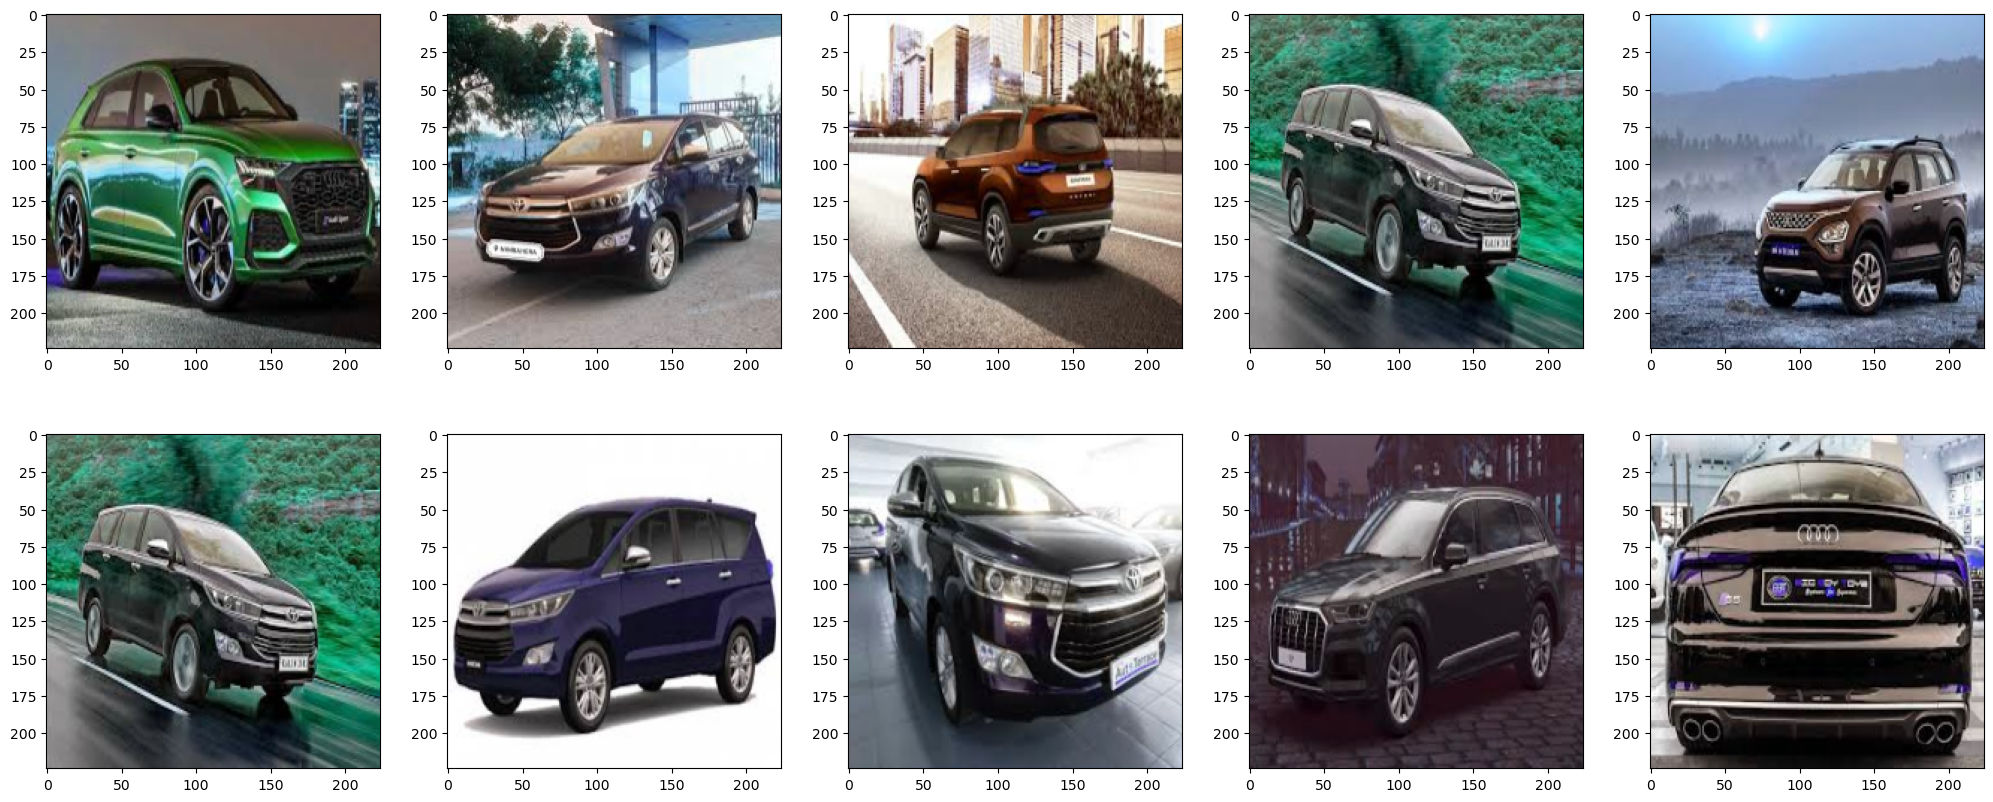

In [6]:
plt.figure(figsize=(25,10))
for i, r_idx in enumerate(np.random.randint(0, len(images['train']), 10)):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(images['train'][r_idx])

### 3. Data Reduction

#### 3.1 PCA

In [7]:
def run_PCA_analysis(data, n_components=150, required_component_ratio = 0.8, randomized = False):
    # PCA
    pca = PCA(n_components, svd_solver="randomized" if randomized else "auto")
    pca_data = pca.fit_transform(data)
    
    # Analyze how many components are required to adequately represent the image data.
    accumulated_ratio = np.cumsum(pca.explained_variance_ratio_)
    ratio_idx = np.argmax(accumulated_ratio >= required_component_ratio)

    # ploting
    plt.figure(figsize=(20,5))
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_)
    plt.xticks(range(1, n_components+1, 3), rotation=70)
    plt.yticks(np.arange(0, 0.30, 0.01), [f"{x*100:.1f}%" for x in np.arange(0, 0.30, 0.01)])
    plt.xlim(0, n_components+1)

    ax = plt.twinx()
    ax.set_yticks(np.arange(0, 1.01, 0.05), [f"{x*100:.1f}%" for x in np.arange(0, 1.01, 0.05)])
    ax.set_ylim(0,1)
    ax.plot(range(1, n_components+1), accumulated_ratio, color='orange')
    ax.axvline(x=ratio_idx, color='red', linestyle='--')
    ax.axhline(y=required_component_ratio, color='red', linestyle='--')

    plt.title("explained variance of each components")
    return pca_data
%time run_PCA_analysis(train_imgs, n_components, required_component_ratio, randomized = True);

NameError: name 'n_components' is not defined

In [ ]:
n_components = 150
required_component_ratio = 0.8
%time run_PCA_analysis(train_imgs, n_components, required_component_ratio);

The analysis above used PCA to deduct the image demension from 150528 to 150. And then the number of components that are required to adequately represent the image data is determined by a 0.8 threshold. As the red dotted lines shown above, it is clear that the first 112 principal components can adequately represent the images with given threshold.

#### 3.2 Random PCA

In [ ]:
%time run_PCA_analysis(train_imgs, n_components, required_component_ratio, randomized = True);

The randomized PCA produced similar result to PCA. The number of components that are required to adequately represent the image data is 112.

#### 3.3 Comparison between PCA and Randomized PCA

### 4. Exceptional Work
#### 4.1 Overall Quality
The report is coherent, useful. and polished product. It make sense overall. The visualizations answered the questions in the Business Understanding. The sources are properly cited in the Reference section. Specific reasons for the assumptions are provided. Subsequent questions are followed naturally from initial exploration.
#### 4.2 Additional analysis

UMAP is one of dimension deduction methods. Compare to other techniques such as t-SNE, UMAP offers a number of advantages. Firstly, it's fast. On MINST dataset, UMAP can project the data less than 3 minutes, while t-SNE can take up to 45 minutes. Secondly, UMAP better preserve global structure of the data. This due to UMAP's strong theoretical foundations. Lastly, UMAP offers more understandable parameters that make it a more effective tool for visualizing high dimensional data.

UMAP starts by constructing a graph that captures relationships between data points. It then optimizes a low-dimensional representation that preserves these relationships, ensuring that nearby points in the high-dimensional space remain close in the reduced space. UMAP strikes a balance between preserving local structure, representing fine details, and maintaining global structure, capturing broader patterns.

In [ ]:
# UMAP dimension deduction
data_umap_unsupervised = umap.UMAP(n_components=3, n_neighbors=500).fit_transform(data_scaled)
data_umap_supervised = umap.UMAP(n_components=3, n_neighbors=500).fit_transform(data_scaled,  y = labels)

# plot the results
plot_colors = labels.map(lambda x: 'red' if x == 1 else 'green')

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(
    data_umap_unsupervised[:, 0],
    data_umap_unsupervised[:, 1],
    data_umap_unsupervised[:, 2],
    c=plot_colors)
plt.title('Unsupervised UMAP Projection of the Stroke Data', fontsize=24)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(
    data_umap_supervised[:, 0],
    data_umap_supervised[:, 1],
    data_umap_supervised[:, 2],
    c=plot_colors)
plt.title('Supervised UMAP Projection of the Stroke Data', fontsize=24)

From the plots shown, the unsupervised UMAP failed to separate the dataset. In contrast, the supervised UMAP is able to separate the data into distinct clusters with data labels, despite that a small portion of stroke data is mixed with other data points.

References:

- Kaggle. Stroke Prediction Dataset. https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download (Accessed 2-04-2024)

- Center for Disease Control and Prevention. Stroke Facts. https://www.cdc.gov/stroke/facts.htm (Accessed 02-05-2024)

- Stroke Awareness Foundation. Stroke Risk Factors. https://www.strokeinfo.org/stroke-risk-factors/ (Accessed 02-05-2024)

- M.S. Pathan, et. al. "Identifying Stroke Indicators Using Rough Sets". https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9264165 (Accessed 02-05-2024)

- E.M. Alanazi, et. al. "Predicting Risk of Stroke From Lab Tests Using Machine Learning Algorithms: Development and Evaluation of Prediction Models" https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8686476/ (Accessed 02-05-2024)

- D. Zaric. Better Heatmaps and Correlation Matrix Plots in Python. https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec#:~:text=Let's%20start%20by%20making%20a,the%20larger%20the%20correlation%20magnitude. (Accessed 02-07-2024) 



